In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
ins = pd.read_csv('../../../eismas/insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
X = ins['age'].values.reshape(-1, 1)
y = ins['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
len(X_train)

896

In [17]:
fit = LinearRegression().fit(X_train, y_train)

In [18]:
predicted = fit.predict(X_test)
predicted

array([14794.08786402, 12586.24456412, 19455.09038601, 15039.40378623,
        8415.87388655, 12095.6127197 ,  8415.87388655, 19455.09038601,
       10623.71718644, 15775.35155286, 11114.34903086, 13812.82417517,
       10869.03310865, 15039.40378623, 18473.82669717, 15284.71970844,
       15775.35155286, 15284.71970844, 15039.40378623, 14303.4560196 ,
        9887.76941981, 14303.4560196 ,  8415.87388655,  9151.82165318,
       16020.66747507, 17001.93116391, 18473.82669717, 10378.40126423,
       15284.71970844,  8170.55796434, 13567.50825296, 17737.87893054,
        8906.50573097, 11114.34903086, 10133.08534202, 14794.08786402,
        8906.50573097, 14303.4560196 , 16511.29931949, 12586.24456412,
        8415.87388655,  9151.82165318, 17492.56300833, 18228.51077496,
       11850.29679749, 18228.51077496,  8906.50573097,  9887.76941981,
       14303.4560196 , 11359.66495307, 19209.7744638 ,  8170.55796434,
       13567.50825296,  8170.55796434, 17492.56300833, 16020.66747507,
      

In [22]:
spejimai = pd.Series(data=predicted, name='Spejimai')
spejimai
orig_rez = pd.Series(data=y_test, name='YTest')


In [25]:
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)
res.head()

,YTest,Spejimai
0,9095.06825,14794.087864
1,5272.17580,12586.244564
2,29330.98315,19455.090386
3,9301.89355,15039.403786
4,33750.29180,8415.873887


<Axes: >

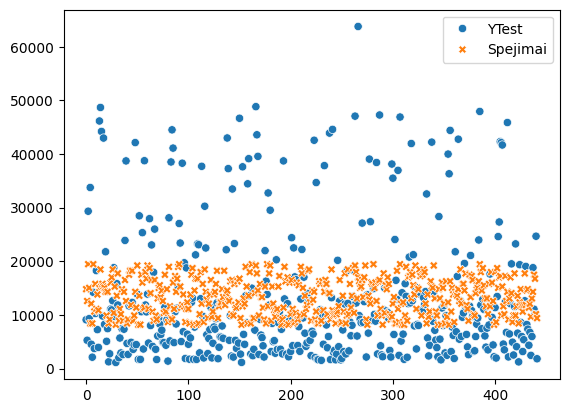

In [26]:
sns.scatterplot(data=res)

In [27]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
X = ins[['age', 'bmi', 'children']]
y = ins['charges']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
fit = LinearRegression().fit(X_train, y_train)

In [31]:
pred = fit.predict(X_test)

In [32]:
spejimai = pd.Series(data=pred, name='Spejimai')

In [33]:
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1)
res.head()

,charges,Spejimai
0,9095.06825,13579.609770
1,5272.17580,11744.155812
2,29330.98315,17097.387504
3,9301.89355,14656.906730
4,33750.29180,8492.898248


<Axes: >

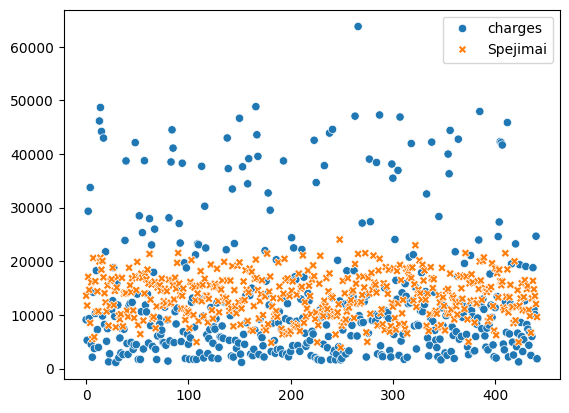

In [34]:
sns.scatterplot(data=res)

In [35]:
fit.score(X_test, y_test) * 100.0

13.51277604693102

In [80]:

sex = pd.get_dummies(ins['sex'], dtype=int)
ins2 = pd.concat([ins, sex], axis=1)
sm = pd.get_dummies(ins['smoker'], dtype=int)
ins3 = pd.concat([ins2, sm], axis=1)
rg = pd.get_dummies(ins['region'], dtype=int)
ins4 = pd.concat([ins3, rg], axis=1)

X = ins4.drop(columns=['sex', 'smoker', 'region', 'charges'])
y = ins4['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test) * 100.0


76.05492639270065

In [81]:
spejimai = pd.Series(data=pred, name='Spejimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1)
res.head()

,charges,Spejimai
0,9095.06825,8826.062271
1,5272.17580,7070.490349
2,29330.98315,37007.238704
3,9301.89355,9438.743581
4,33750.29180,27105.419450


<Axes: >

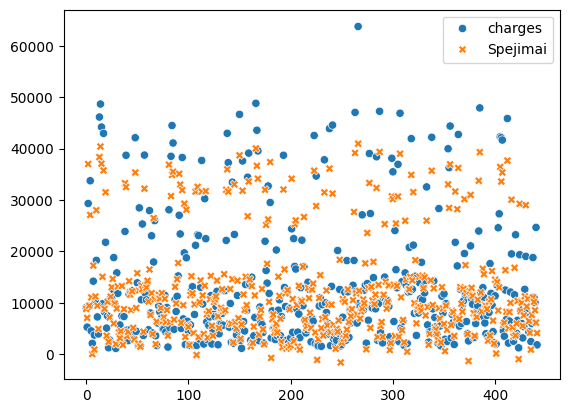

In [82]:
sns.scatterplot(data=res)

In [84]:
fit.predict(np.reshape([32, 22, 1, 1, 0, 1, 0, 0, 1,0 ,0], (1, -1)))

array([3612.25866984])

In [117]:

# Naudojamas seaborn pateikiamas duomenų rinkinys. Užduotis:
# Sukurti tiesinės regresijos modelį, kuris prognozuotų automobilio
# degalų suvartojimą (mpg - miles per gallon).

# Pridėkite vartotojo įvestį

mpg = sns.load_dataset('mpg')
mpg.dropna(inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [118]:
ori = pd.get_dummies(mpg['origin'], dtype=int)
mpg2 = pd.concat([mpg, ori], axis=1)
mpg2.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,0,1


In [119]:
# X = mpg['cylinders'].values.reshape(-1, 1)

X = mpg2.drop(columns=['origin', 'name', 'mpg'])
y = mpg2['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
fit = LinearRegression().fit(X_train, y_train)
predicted = fit.predict(X_test)

spejimai = pd.Series(data=predicted, name='Spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)
res.head()

,YTest,Spejimai
0,26.0,27.356332
1,21.6,27.057310
2,36.1,34.524493
3,26.0,24.684753
4,27.0,28.042054


In [121]:
fit.score(X_test, y_test) * 100.0

79.64817032975604

<Axes: >

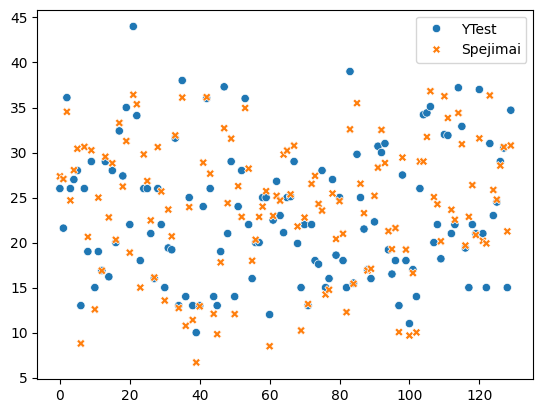

In [122]:
sns.scatterplot(data=res)

In [135]:
cylinder = 8
displacement = 307
horsepower = 130
weight = 3504
accel = 12
year = 70
eu = 0
jp = 0
usa = 1


ats = fit.predict(np.reshape([cylinder, displacement, horsepower, weight, accel, year, eu, jp, usa], (1, -1)))
print(f'mpg: {float(ats):.2f}')

mpg: 15.00


In [148]:
# Turime lentelę su 7-niomis žuvų rūšim, bei įvairiais jų
# išmatavimais. Vienas iš jų yra svoris (weight) - tai bus target
# stulpelis. Sukurkite tiesinės regresijos modelį, kuris pagal kitus
# lentelės stulpelius spėlios žuvies svorį

fish = pd.read_csv('../../../eismas/Fish.csv')

spec = pd.get_dummies(fish['Species'], dtype=int)

fish2 = pd.concat([fish, spec], axis=1)
# fish2.head(2)

X = fish2.drop(columns=['Species', 'Weight'])
y = fish2['Weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
predicted = fit.predict(X_test)

spejimai = pd.Series(data=predicted, name='Spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)
# res.head()


fit.score(X_test, y_test) * 100.0

95.07352480054514

<Axes: >

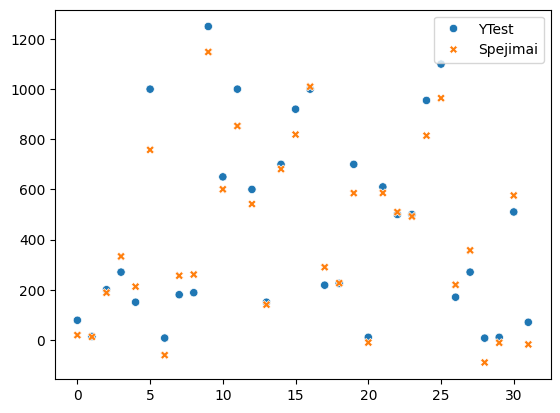

In [149]:
sns.scatterplot(data=res)

In [151]:

Length1 =23.2
Length2 = 25.4
Length3 = 30.0
Height = 11.52
Width = 4.02
Bream = 1
Parkki = 0
Perch = 0
Pike = 0
Roach = 0
Smelt = 0
Whitefish = 0

ats = fit.predict(np.reshape([Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt, Whitefish], (1, -1)))
print(f'svoris: {float(ats):.2f}')

svoris: 290.82
